In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from scipy import signal
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
get_ipython().magic('matplotlib inline')
from tqdm import tqdm


In [2]:
os.listdir(path='..\Desktop\Speech dataset')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = '..\Desktop\Speech dataset'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

1440

In [3]:
import speech_recognition as sr
r=sr.Recognizer()
for file in range(0 , 10 , 1):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

talking by the door
kids talking by the door
dogs sitting by the door
talk to Siri why the door
error
talking by the door
by the door
dogs sitting by the door
change your talking by the door
kids are talking by the door


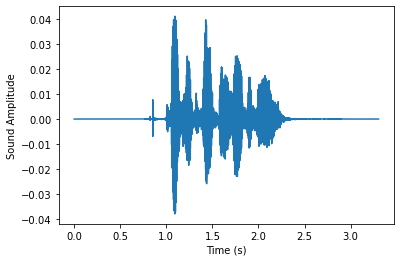

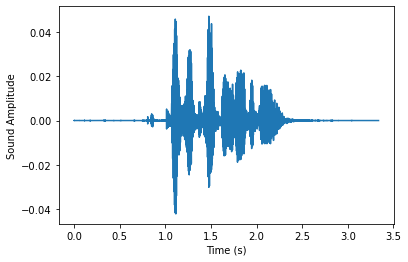

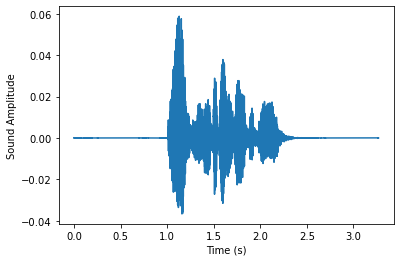

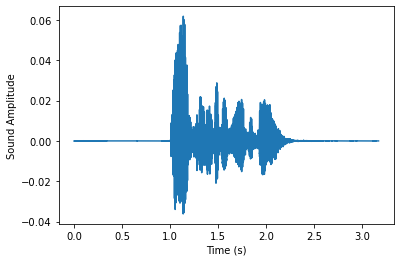

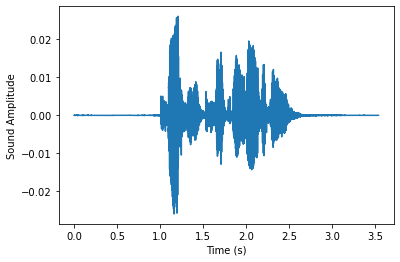

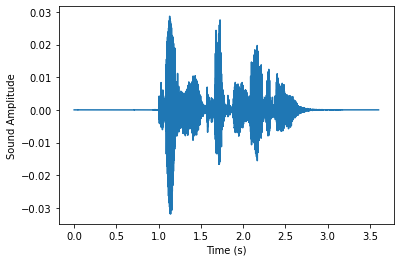

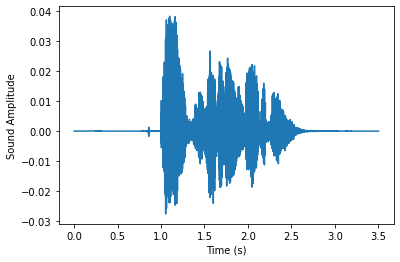

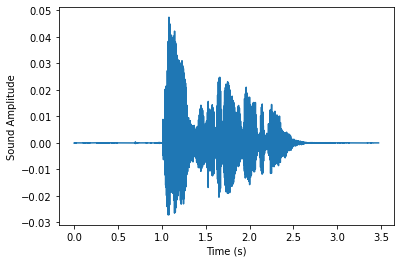

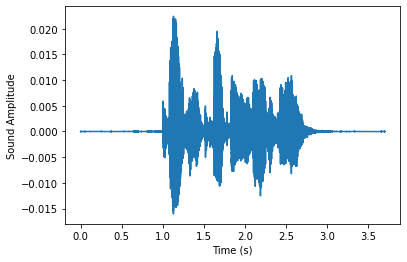

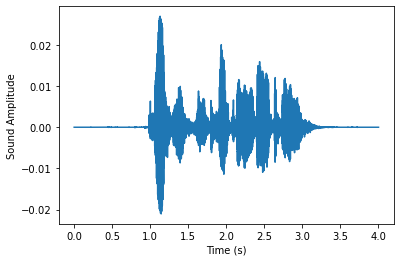

In [3]:
#Plotting the Basic Graphs for understanding of Audio Files :
for file in range(0 , 10 , 1):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude')
    plt.show()
    


In [11]:
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [12]:
import glob,pickle
for file in tqdm(glob.glob(r'C:\Users\User\OneDrive\Desktop\speech dataset\\**\\*.wav')):
    file_name = os.path.basename(file)
    signal , rate = lr.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'C:\Users\User\OneDrive\Desktop\clean_speech\\'+str(file_name), rate=rate,data=signal[mask])

  1%|          | 10/1441 [00:04<09:33,  2.49it/s]


KeyboardInterrupt: 

In [6]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import os, glob, pickle
import librosa
from scipy import signal
import noisereduce as nr
from glob import glob
import librosa
get_ipython().magic('matplotlib inline')

import soundfile
from sklearn.model_selection import train_test_split

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

C:\Users\User\anaconda3\lib\site-packages\noisereduce\noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [7]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
observed_emotions=['angry', 'surprised', 'happy', 'calm']

In [8]:
from glob import glob
import os
import glob
def load_data(test_size=0.33):
    x,y=[],[]
    answer = 0
    for file in glob.glob(r'C:\Users\User\OneDrive\Desktop\clean_speech\\*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            answer += 1
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append([emotion,file_name])
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [9]:
import librosa
import numpy as np
x_train,x_test,y_trai,y_tes=load_data(test_size=0.25)
print(np.shape(x_train),np.shape(x_test), np.shape(y_trai),np.shape(y_tes))
y_test_map = np.array(y_tes).T
y_test = y_test_map[0]
test_filename = y_test_map[1]
y_train_map = np.array(y_trai).T
y_train = y_train_map[0]
train_filename = y_train_map[1]
print(np.shape(y_train),np.shape(y_test))
arr = np.stack((test_filename,y_test), axis=1)
print(*arr,sep="\n")   


(576, 180) (192, 180) (576, 2) (192, 2)
(576,) (192,)
['03-01-05-01-02-02-01.wav' 'angry']
['03-01-03-01-02-01-21.wav' 'happy']
['03-01-08-01-02-02-04.wav' 'surprised']
['03-01-02-02-01-02-24.wav' 'calm']
['03-01-08-01-02-02-19.wav' 'surprised']
['03-01-05-01-01-01-07.wav' 'angry']
['03-01-08-01-01-01-16.wav' 'surprised']
['03-01-02-01-02-02-06.wav' 'calm']
['03-01-05-01-01-02-07.wav' 'angry']
['03-01-05-02-01-01-15.wav' 'angry']
['03-01-02-02-02-02-07.wav' 'calm']
['03-01-05-01-02-02-19.wav' 'angry']
['03-01-05-02-02-02-05.wav' 'angry']
['03-01-05-01-01-01-14.wav' 'angry']
['03-01-05-01-02-01-15.wav' 'angry']
['03-01-03-02-02-01-06.wav' 'happy']
['03-01-02-01-01-02-16.wav' 'calm']
['03-01-08-01-01-01-13.wav' 'surprised']
['03-01-03-02-02-02-24.wav' 'happy']
['03-01-02-01-02-02-19.wav' 'calm']
['03-01-02-02-01-02-09.wav' 'calm']
['03-01-02-01-01-02-07.wav' 'calm']
['03-01-03-01-02-01-13.wav' 'happy']
['03-01-02-01-02-01-18.wav' 'calm']
['03-01-02-02-02-02-03.wav' 'calm']
['03-01-02-02-

In [7]:
#pwd

In [10]:

print(f'Features extracted: {x_train.shape[1]}')


Features extracted: 180


In [131]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.001, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='constant', max_iter=700,activation='tanh')


In [132]:
model.fit(x_train,y_train)

MLPClassifier(activation='tanh', alpha=0.001, batch_size=256,
              hidden_layer_sizes=(400,), max_iter=700)

In [133]:
import pickle
# Save the Modle to file in the current working directory
#For any new testing data other than the data in dataset

Pkl_Filename = "Emotion_Voice_Detection_Model4.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [134]:
with open(Pkl_Filename, 'rb') as file:  
    Emotion_Voice_Detection_Model4= pickle.load(file)

Emotion_Voice_Detection_Model4

MLPClassifier(activation='tanh', alpha=0.001, batch_size=256,
              hidden_layer_sizes=(400,), max_iter=700)

In [135]:
print(x_test.shape)
y_pred=Emotion_Voice_Detection_Model4.predict(x_test)
y_pred

(192, 180)


array(['angry', 'happy', 'surprised', 'calm', 'surprised', 'angry',
       'surprised', 'calm', 'angry', 'angry', 'calm', 'happy', 'angry',
       'surprised', 'happy', 'happy', 'calm', 'surprised', 'happy',
       'calm', 'calm', 'calm', 'happy', 'calm', 'calm', 'calm',
       'surprised', 'happy', 'surprised', 'calm', 'surprised',
       'surprised', 'surprised', 'happy', 'angry', 'surprised', 'angry',
       'surprised', 'surprised', 'angry', 'surprised', 'calm',
       'surprised', 'angry', 'angry', 'calm', 'angry', 'surprised',
       'calm', 'calm', 'angry', 'happy', 'surprised', 'calm', 'surprised',
       'surprised', 'angry', 'calm', 'happy', 'calm', 'calm', 'angry',
       'angry', 'surprised', 'calm', 'angry', 'angry', 'happy', 'angry',
       'angry', 'surprised', 'calm', 'calm', 'calm', 'surprised', 'calm',
       'happy', 'surprised', 'calm', 'surprised', 'happy', 'angry',
       'angry', 'angry', 'happy', 'calm', 'angry', 'surprised', 'happy',
       'angry', 'calm', 'su

In [136]:
import numpy as np
import pandas as pd
y_pred1 = pd.DataFrame(y_pred, columns=['predictions'])
y_pred1['file_names'] = test_filename
print(y_pred1)
y_pred1.to_csv('predictionfinal.csv')

    predictions                file_names
0         angry  03-01-05-01-02-02-01.wav
1         happy  03-01-03-01-02-01-21.wav
2     surprised  03-01-08-01-02-02-04.wav
3          calm  03-01-02-02-01-02-24.wav
4     surprised  03-01-08-01-02-02-19.wav
..          ...                       ...
187   surprised  03-01-08-01-02-02-14.wav
188       happy  03-01-03-02-02-02-02.wav
189       angry  03-01-05-02-01-01-14.wav
190   surprised  03-01-08-01-01-02-02.wav
191        calm  03-01-02-02-02-01-22.wav

[192 rows x 2 columns]


In [137]:
from bs4 import BeautifulSoup as SOUP
import re
import requests as HTTP
  
# Main Function for scraping
def movie_recommend(emotion):
  
   
    # IMDb Url for Musical genre of
    # movie against emotion Disgust
    if(emotion == "angry"):
        return 'http://www.imdb.com/search/title?genres=family&title_type=feature&sort=moviemeter, asc'
    
    elif(emotion == "surprised"):
        return 'http://www.imdb.com/search/title?genres=film_noir&title_type=feature&sort=moviemeter, asc'
    
    elif(emotion == "happy"):
        return 'http://www.imdb.com/search/title?genres=thriller&title_type=feature&sort=moviemeter, asc'
  
   
    elif(emotion == "calm"):
        return 'http://www.imdb.com/search/title?genres=western&title_type=feature&sort=moviemeter, asc'
  
        
    

In [138]:
recommendation = movie_recommend(y_pred[0])
print(y_pred[0]+" emotion detected :"+recommendation)


angry emotion detected :http://www.imdb.com/search/title?genres=family&title_type=feature&sort=moviemeter, asc


In [139]:
import pyaudio
import wave
CHUNK = 1024 
FORMAT = pyaudio.paInt16 
CHANNELS = 2 
RATE = 44100 
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) 
print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) 

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


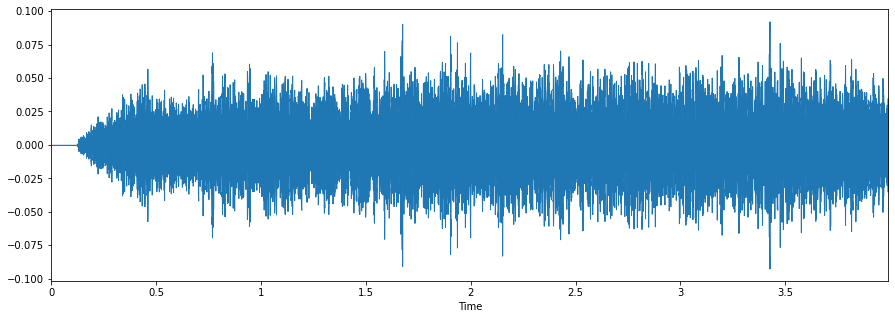

In [140]:
data, sampling_rate = librosa.load('Output10.wav')
%matplotlib inline
import os
import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [141]:
from pydub import AudioSegment
sound = AudioSegment.from_wav("Output10.wav")
sound = sound.set_channels(1)
sound.export("Output11.wav", format="wav")





<_io.BufferedRandom name='Output11.wav'>

In [142]:
file="Output11.wav"
ans =[]
new_feature  = extract_feature(file, mfcc=True, chroma=True, mel=True)
ans.append(new_feature)
ans = np.array(ans)
print(ans.ndim)
print(ans.shape)
print(ans)
# data.shape

pred=Emotion_Voice_Detection_Model4.predict(ans)
print(pred)

2
(1, 180)
[[-3.68536774e+02  1.96075821e+02 -5.32259865e+01  4.11074371e+01
  -4.03726006e+01  2.25884533e+01 -1.41426916e+01 -8.16212845e+00
   6.22335339e+00 -2.07972126e+01  1.45835514e+01 -2.22735615e+01
  -1.59106326e+00 -1.22538557e+01 -1.66717815e+01 -2.64620137e+00
  -2.32448292e+01 -5.86006820e-01 -1.63833160e+01 -7.72308779e+00
  -5.53201914e+00 -8.97051239e+00  2.49439144e+00 -1.20020027e+01
  -5.74851453e-01 -8.55454063e+00 -4.24038029e+00 -2.58633757e+00
  -9.78102779e+00 -1.63228989e+00 -1.03839960e+01 -3.58652163e+00
  -6.86935997e+00 -6.34179115e+00 -4.44117689e+00 -6.43678331e+00
  -7.29795575e-01 -7.33734846e+00 -2.08176494e+00 -4.26801443e+00
   7.17092395e-01  7.78965235e-01  8.03980291e-01  7.85360038e-01
   7.97165394e-01  8.04973245e-01  8.42160404e-01  8.87384474e-01
   7.90988028e-01  7.29208887e-01  6.95950627e-01  6.90483212e-01
   2.55150866e-04  3.93843185e-03  9.09857750e-02  3.41480374e-01
   6.61121488e-01  1.01716805e+00  6.41096473e-01  4.43058223e-01

In [143]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion

array([[46,  0,  2,  5],
       [ 1, 52,  1,  0],
       [ 3,  3, 29,  6],
       [ 3,  0,  6, 35]], dtype=int64)

In [144]:
metrics.accuracy_score(y_test, y_pred)

0.84375

In [145]:
class_wise = metrics.classification_report(y_test, y_pred)
print(class_wise)

              precision    recall  f1-score   support

       angry       0.87      0.87      0.87        53
        calm       0.95      0.96      0.95        54
       happy       0.76      0.71      0.73        41
   surprised       0.76      0.80      0.78        44

    accuracy                           0.84       192
   macro avg       0.83      0.83      0.83       192
weighted avg       0.84      0.84      0.84       192

